In [159]:
# Load dependencies
import numpy as np
import pandas as pd
import seaborn as sns

In [160]:
# Helper functions
def clean_cols(cols):
    return [col.lower() for col in cols]

In [161]:
file_path = "C:/Users/domen/github/pokemon_classification/datasets/Pokemon.csv"

df = pd.read_csv(file_path)
df.columns = clean_cols(df.columns)

In [162]:
df.head(4)

,pokedex no.,name,type,other type,hp,attack,defense,special attack,special defense,speed,total,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,0
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pokedex no.      1045 non-null   int64 
 1   name             1045 non-null   object
 2   type             1045 non-null   object
 3   other type       553 non-null    object
 4   hp               1045 non-null   int64 
 5   attack           1045 non-null   int64 
 6   defense          1045 non-null   int64 
 7   special attack   1045 non-null   int64 
 8   special defense  1045 non-null   int64 
 9   speed            1045 non-null   int64 
 10  total            1045 non-null   int64 
 11  generation       1045 non-null   int64 
 12  legendary        1045 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 106.3+ KB


As we had guessed, there is quite a significant class imbalance in the dataset. Less than 10% of the Pokemon are legendary.

In [164]:
print("-- pct")
print(df.legendary.value_counts(normalize=True))
print("-- counts")
print(df.legendary.value_counts())


-- pct
0    0.878469
1    0.121531
Name: legendary, dtype: float64
-- counts
0    918
1    127
Name: legendary, dtype: int64


array([[<AxesSubplot:title={'center':'hp'}>,
        <AxesSubplot:title={'center':'attack'}>,
        <AxesSubplot:title={'center':'defense'}>,
        <AxesSubplot:title={'center':'special attack'}>],
       [<AxesSubplot:title={'center':'special defense'}>,
        <AxesSubplot:title={'center':'speed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

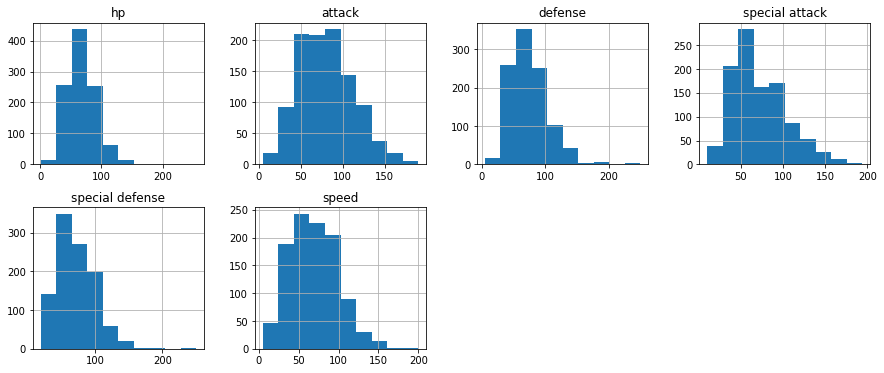

In [165]:
numerical = ['hp', 'attack', 'defense', 'special attack', 'special defense', 'speed']
df[numerical].hist(figsize=(15,6), layout=(2,4))

[Text(0.5, 1.0, 'total stats by Pokemon generation')]

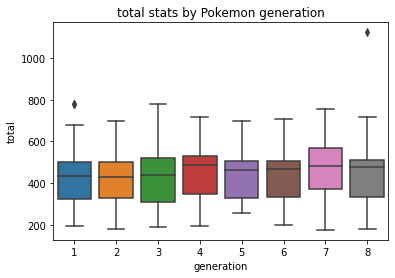

In [166]:
sns.boxplot(x=df.generation, y=df.total).set(title="total stats by Pokemon generation")

[Text(0.5, 1.0, 'total stats by Pokemon generation - no legendaries')]

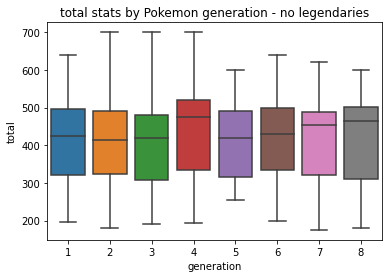

In [167]:
no_legendary_df = df[df.legendary==False]
(sns.boxplot(
    x=no_legendary_df.generation,
    y=no_legendary_df.total)
    .set(title="total stats by Pokemon generation - no legendaries"))


[Text(0.5, 1.0, 'total stats by Pokemon generation - only legendaries')]

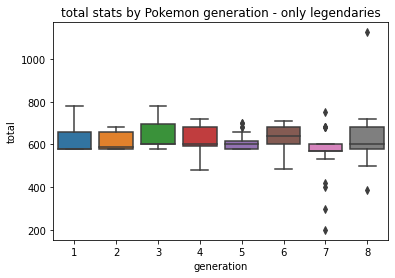

In [168]:
legendary_df = df[df.legendary==True]
(sns.boxplot(
    x=legendary_df.generation,
    y=legendary_df.total)
    .set(title="total stats by Pokemon generation - only legendaries"))


In [169]:
df[df.legendary==True].sort_values(by = 'total', ascending = False).head()
#df.sort_values(by = 'total', ascending = False).head(100)

df['name'] = df.name.str.lower()
df['variant_ind'] = np.where(df.name.str.startswith(("mega ", "ultra ", "primal ")), 1,
                             np.where(df.name.str.endswith(("eternamax", "10% forme", "50% forme")), 1, 0))
df['forme_ind'] = np.where(df.name.str.endswith(("forme")), 1, 0)

df.sort_values(by = 'total', ascending = False).head(50)
df[df.name.str.contains('forme')]

,pokedex no.,name,type,other type,hp,attack,defense,special attack,special defense,speed,total,generation,legendary,variant_ind,forme_ind
466,386,deoxys normal forme,Psychic,NaN,50,150,50,150,50,150,600,3,1,0,1
467,386,deoxys attack forme,Psychic,NaN,50,180,20,180,20,150,600,3,1,0,1
468,386,deoxys defense forme,Psychic,NaN,50,70,160,70,160,90,600,3,1,0,1
469,386,deoxys speed forme,Psychic,NaN,50,95,90,95,90,180,600,3,1,0,1
582,487,giratina altered forme,Ghost,Dragon,150,100,120,100,120,90,680,4,1,0,1
583,487,giratina origin forme,Ghost,Dragon,150,120,100,120,100,90,680,4,1,0,1
588,492,shaymin land forme,Grass,NaN,100,100,100,100,100,100,600,4,1,0,1
589,492,shaymin sky forme,Grass,Flying,100,103,75,120,75,127,600,4,1,0,1
746,641,tornadus incarnate forme,Flying,NaN,79,115,70,125,80,111,580,5,1,0,1
747,641,tornadus therian forme,Flying,NaN,79,100,80,110,90,121,580,5,1,0,1


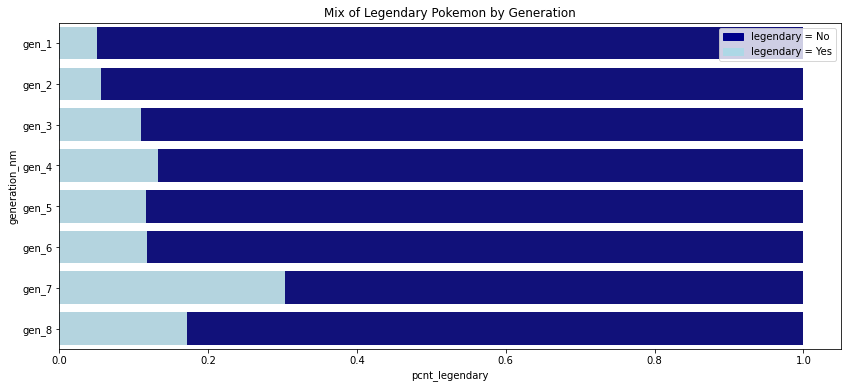

,generation_nm,name,legendary,pcnt_legendary,all
0,gen_1,197,10,0.0508,1
1,gen_2,108,6,0.0556,1
2,gen_3,165,18,0.1091,1
3,gen_4,121,16,0.1322,1
4,gen_5,171,20,0.1170,1
5,gen_6,85,10,0.1176,1
6,gen_7,99,30,0.3030,1
7,gen_8,99,17,0.1717,1


In [170]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
#poke = sns.load_dataset(df)

# set the figure size
plt.figure(figsize=(14, 6))

# from raw value to percentage
df[['generation_nm']] = 'gen_' + df['generation'].astype(str)
pokemon = df.groupby('generation_nm')['name'].count().reset_index()
legendary = df[df.legendary==True].groupby('generation_nm')['legendary'].count().reset_index()
poke = pokemon.merge(legendary, how = "left", on = "generation_nm")
poke[["pcnt_legendary"]] = round(poke.legendary / poke.name, 4)
poke[["all"]] = 1


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(y="generation_nm",  x="all", data=poke, color="darkblue").set_title("Mix of Legendary Pokemon by Generation")
bar2 = sns.barplot(y="generation_nm",  x="pcnt_legendary", data=poke, color="lightblue")

# add legend
top_bar = mpatches.Patch(color='darkblue', label='legendary = No')
bottom_bar = mpatches.Patch(color='lightblue', label='legendary = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()
poke

Beause we have class imbalance, the following performance measures should be considered when evaluating our model:
- Confusion matrix
- Precision (exactness)
- Recall (completeness)
- F-score (weighted average of precision and recall)
- ROC curves (sensitivity and specificity)
- Kappa (or Cohen's kappa)

## SMOTE class balancing

In [181]:
import imblearn as imb
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from matplotlib import pyplot
from numpy import numpy


# define dataset
x, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

# summarize class distribution
counter = Counter(y)
print(counter)

x_resampled, y_resampled = SMOTE().fit_resample(x, y)


ImportError: cannot import name 'numpy' from 'numpy' (C:\Users\domen\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\__init__.py)

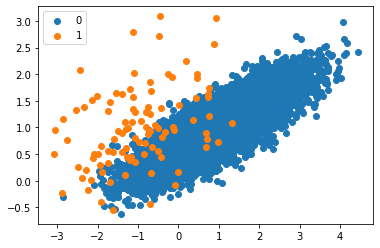

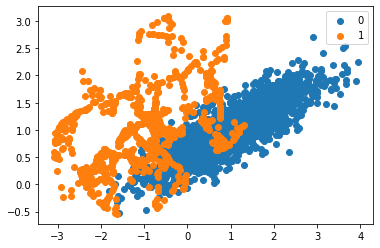

original: Counter({0: 9900, 1: 100})
balanced: Counter({0: 1980, 1: 990})
Mean ROC AUC: 0.758
Mean ROC AUC: 0.838


In [208]:
# Credit
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/from collections import Counter

# load dependencies
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline# define dataset

# define dataset
x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# define class balancing pipeline: first oversample, then undersample
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

# create new datasets
x2, y2 = pipeline.fit_resample(x, y)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y2 == label)[0]
	pyplot.scatter(x2[row_ix, 0], x2[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# summarize counts of the new class distribution
counter2 = Counter(y2)
print(f'original: {counter}\nbalanced: {counter2}')

# define model (applied to original dataset)
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

# define model (applied to balanced dataset

# define pipeline
#steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

In [209]:
# SMOTE uses k-nearest neighbours value of k=5 by default
# we can grid search some values to see if it changes our results

# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.838
> k=2, Mean ROC AUC: 0.831
> k=3, Mean ROC AUC: 0.823
> k=4, Mean ROC AUC: 0.843
> k=5, Mean ROC AUC: 0.851
> k=6, Mean ROC AUC: 0.850
> k=7, Mean ROC AUC: 0.846
